In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

In [2]:
# Define the true function (1D toy example)
def f(x):
    return -1 * np.sin(3 * x) - x**2 + 0.7 * x

# Define the GP-UCB acquisition function
def gp_ucb(gp_model, X, beta=2.0):
    mean, var = gp_model.predict(X)
    std_dev = np.sqrt(var)
    return mean + beta * std_dev

# Define the initial sample points
num_initial_points = 5
X_sample = np.random.uniform(-2, 2, size=(num_initial_points, 1))
Y_sample = f(X_sample)

In [3]:
# Create the GP model
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
gp_model = GPy.models.GPRegression(X_sample, Y_sample, kernel)

# Optimization loop
num_iterations = 15
for i in range(num_iterations):
    # Update the GP model
    gp_model.optimize_restarts(num_restarts=10, verbose=False)
    
    # Calculate the GP-UCB acquisition function
    X = np.linspace(-2, 2, 1000).reshape(-1, 1)
    ucb_values = gp_ucb(gp_model, X)

    # Select the point with the highest GP-UCB value
    X_next = X[np.argmax(ucb_values)]

    # Evaluate the true function at the selected point
    Y_next = f(X_next)

    # Add the new point to the dataset
    X_sample = np.vstack((X_sample, X_next))
    Y_sample = np.vstack((Y_sample, Y_next))

    # Update the GP model with the new data
    gp_model.set_XY(X_sample, Y_sample)

 C:\Users\cgwie\anaconda3\lib\site-packages\GPy\kern\src\rbf.py:52: RuntimeWarning:overflow encountered in square


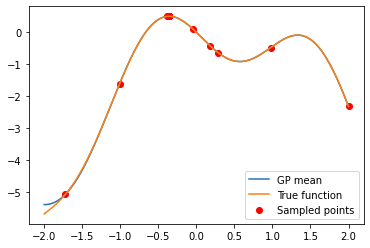

In [4]:
# Plot the final results
plt.figure()
X_plot = np.linspace(-2, 2, 1000).reshape(-1, 1)
mean, _ = gp_model.predict(X_plot)
plt.plot(X_plot, mean, label='GP mean')
plt.plot(X_plot, f(X_plot), label='True function')
plt.scatter(X_sample, Y_sample, color='red', label='Sampled points')
plt.legend()
plt.show()